In [9]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [10]:
dataset_folder = '../../datasets/diabetes/'
target_idx = 8
balance = True
features_to_use = [0, 1, 2, 3, 4, 5, 6, 7]
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'diabetes.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use, 
            discretize=True, balance=balance, skip_first=True)
            
print(dataset.train[2])

[13.  2.  0.  1.  3.  0.  3.  2.]


In [11]:
c = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)
#print(np.unique(dataset.labels_train))
print('Train', sklearn.metrics.accuracy_score(dataset.labels_train, c.predict(dataset.train)))
print('Test', sklearn.metrics.accuracy_score(dataset.labels_test, c.predict(dataset.test)))

Train 1.0
Test 0.7777777777777778


In [12]:
transformed_data = []

for r in dataset.train:
    transformed_data.append([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(r)])        

print(transformed_data[0])

train_data = pd.DataFrame(transformed_data, columns=dataset.feature_names)
print(train_data.shape)
nb_vals = 50

print(dataset.train[0])
print(dataset.train[0].reshape(1, -1))
y=[]
for k in range(0, nb_vals):
    y.append(c.predict(dataset.train[k].reshape(1, -1))[0])


['1', '99.00 < Glucose <= 117.00', 'BloodPressure <= 62.00', '0.00 < SkinThickness <= 23.00', '30.50 < Insulin <= 127.25', 'BMI <= 27.30', '0.37 < DiabetesPedigreeFunction <= 0.63', '24.00 < Age <= 29.00']
(428, 8)
[1. 1. 0. 1. 2. 0. 2. 1.]
[[1. 1. 0. 1. 2. 0. 2. 1.]]


In [13]:
import sys
sys.path.append(sys.path[0] + '/..')

import arg_explainer as ae
from importlib import reload
reload(ae)
import arg_explainer as ae

print(dataset.feature_names)
explainer = ae.ArgTabularExplainer(c, train_data.iloc[0:nb_vals], y, 'diabetes_' + str(nb_vals), compute=True, output_path='../saves')

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Generating arguments
len  1 : 3 ,  6
41 potential arg checked ( 0 not minimal)
len  2 : 91 ,  79
395 potential arg checked ( 96 not minimal)
len  3 : 111 ,  139
554 potential arg checked ( 1337 not minimal)
len  4 : 4 ,  2
178 potential arg checked ( 2833 not minimal)
len  5 : 0 ,  0
63 potential arg checked ( 2554 not minimal)
len  6 : 0 ,  0
16 potential arg checked ( 1333 not minimal)
len  7 : 0 ,  0
2 potential arg checked ( 388 not minimal)
len  8 : 0 ,  0
0 potential arg checked ( 49 not minimal)
Saving to  ../saves\diabetes_50_minimals.df


In [14]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../saves')

209 226  args total
diabetes_50
edges per node: 173.02988505747126


['diabetes_100_atk_graph.df', 'diabetes_200_atk_graph.df', 'diabetes_300_atk_graph.df', 'diabetes_400_atk_graph.df', 'diabetes_50_atk_graph.df'] ['diabetes_100_R_atk.df', 'diabetes_200_R_atk.df', 'diabetes_300_R_atk.df', 'diabetes_400_R_atk.df', 'diabetes_50_R_atk.df']
[211460, 546608, 913479, 1392633, 37634]


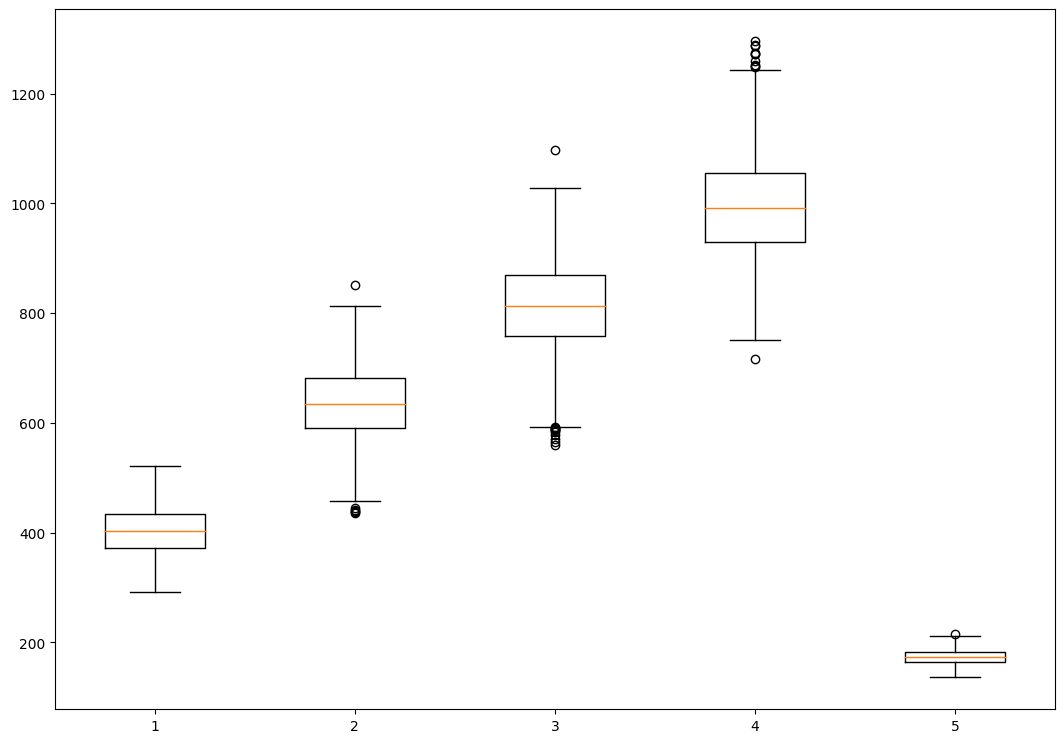

In [15]:
explainer.af_analysis()

In [33]:
ext_gen = explainer.extension_generator_from_graph()
#ext_gen = explainer.extension_generator_from_sat(file='../saves/diabetes_100_sat.txt')
max_covi_ext = explainer.make_selection('max_covi', ext_gen)

Working with NetworkX to find naive extensions:
Graph density =  0.3733760810660332


KeyboardInterrupt: 

In [56]:
#sel = explainer.make_selection(max_covi_ext, 'max_covc')
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations()


{frozenset({33}), frozenset({23}), frozenset({32, 43}), frozenset({34}), frozenset({27}), frozenset({32, 3}), frozenset({32, 6}), frozenset({24}), frozenset({26}), frozenset({32, 14}), frozenset({28}), frozenset({29}), frozenset({30}), frozenset({32, 18}), frozenset({32, 1}), frozenset({32, 52})}
id: 0 coverage: 2 Arg 1/2: frozenset({'Education_Some-college', 'Occupation_Sales'})
id: 1 coverage: 0 Arg 1/0: None
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 2 Arg 1/1: frozenset({'Occupation_Machine-op-inspct'})
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 2 Arg 1/1: frozenset({'Occupation_Farming-fishing'})
id: 6 coverage: 0 Arg 1/0: None
id: 7 coverage: 2 Arg 1/3: frozenset({'Occupation_Sales', 'Sex_Female'})
id: 8 coverage: 0 Arg 1/0: None
id: 9 coverage: 3 Arg 1/1: frozenset({'Occupation_Prof-specialty'})
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 1 Arg 1/1: frozenset({'Occupation_Transport-moving'})
id: 12 coverage: 0 Arg 1/0: None
id: 13 coverage: 1 Arg 1/1: frozenset({

## Sat solver: ASPARTIX

In [ ]:
ext_gen = explainer.extension_generator(file='asp_test.txt')
max_covi_ext = explainer.make_selection(ext_gen, 'max_covi')

In [ ]:
explainer.set_strategy('max_covc', 'existence')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.4019384124647283
Number of extensions: 1326480
Time spent on naive extensions: 55.99906277656555 s ( 86.23851943016052 )
len(max_cov_exts)= 1326478 / 1326480
Covc strategy's coverage: 2
Top 5 covs: [2, 2, 2, 2, 2]
id: 0 coverage: 1 Arg 1/12: frozenset({'Relationship_Husband', 'Country_United-States', 'Education_Some-college'})
id: 1 coverage: 1 Arg 1/10: frozenset({'Marital Status_Never-married', 'Age_37.00 < Age <= 48.00'})
id: 2 coverage: 1 Arg 1/22: frozenset({'Age_Age > 48.00', 'Occupation_Exec-managerial', 'Capital Gain_0', 'Workclass_Private'})
id: 3 coverage: 1 Arg 1/18: frozenset({'Hours per week_Hours per week <= 40.00', 'Occupation_Machine-op-inspct'})
id: 4 coverage: 1 Arg 1/17: frozenset({'Capital Loss_0', 'Capital Gain_0', 'Occupation_Sales', 'Hours per week_Hours per week <= 40.00', 'Relationship_Husband'})
id: 5 coverage: 1 Arg 1/8: frozenset({'Occupation_Farming-fishing', 'Hours per week_Hours per week <= 40.00'})
id: 6 coverage: 1 Arg 1/24: frozenset({'Education_Bach

In [ ]:
explainer.set_strategy('max_covc', 'universal')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.40616693248272195
Number of extensions: 521076
len(max_cov_exts)= 521074 / 521076
Covc strategy's coverage: 2
Top 5 covs: [2, 2, 2, 2, 2]
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 0 Arg 1/0: None
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 0 Arg 1/0: None
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 0 Arg 1/0: None
id: 6 coverage: 0 Arg 1/0: None
id: 7 coverage: 0 Arg 1/0: None
id: 8 coverage: 0 Arg 1/0: None
id: 9 coverage: 0 Arg 1/0: None
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 0 Arg 1/0: None
id: 12 coverage: 0 Arg 1/0: None
id: 13 coverage: 0 Arg 1/0: None
id: 14 coverage: 0 Arg 1/0: None
id: 15 coverage: 0 Arg 1/0: None
id: 16 coverage: 0 Arg 1/0: None
id: 17 coverage: 0 Arg 1/0: None
id: 18 coverage: 0 Arg 1/0: None
id: 19 coverage: 0 Arg 1/0: None
id: 20 coverage: 0 Arg 1/0: None
id: 21 coverage: 0 Arg 1/0: None
id: 22 coverage: 0 Arg 1/0: None
id: 23 coverage: 0 Arg 1/0: None
id: 24 coverage: 0 Arg 1/0: None
id: 25 coverage: 0 Arg 1/0: None
id: 26 cover

In [ ]:
explainer.set_strategy('max_covi', 'universal')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.40616693248272195
Number of extensions: 521076
len(max_cov_exts)= 12 / 521076
Covi strategy's coverage: 60
Top 5 covs: [58, 58, 58, 58, 58]
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 5 Arg 1/4: frozenset({'Relationship_Not-in-family', 'Occupation_Exec-managerial'})
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 3 Arg 1/1: frozenset({'Occupation_Machine-op-inspct', 'Age_28.00 < Age <= 37.00'})
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 2 Arg 1/1: frozenset({'Occupation_Farming-fishing', 'Age_28.00 < Age <= 37.00'})
id: 6 coverage: 2 Arg 1/1: frozenset({'Sex_Female', 'Occupation_Protective-serv'})
id: 7 coverage: 3 Arg 1/1: frozenset({'Occupation_Sales', 'Education_Bachelors'})
id: 8 coverage: 2 Arg 1/1: frozenset({'Occupation_?', 'Sex_Male'})
id: 9 coverage: 3 Arg 1/2: frozenset({'Occupation_Prof-specialty', 'Education_Bachelors', 'Workclass_Private'})
id: 10 coverage: 4 Arg 1/1: frozenset({'Occupation_Protective-serv', 'Sex_Male'})
id: 11 coverage: 1 Arg 1/1: frozenset({'A

In [ ]:
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    dataset.class_names,
    dataset.feature_names,
    dataset.train,
    dataset.categorical_names)
idx = 0
np.random.seed(1)
instance = dataset.train[idx].reshape(1, -1)[0]
print("Anchor")
print([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(instance)])

print('Prediction: ', anchor_explainer.class_names[c.predict(dataset.train[0].reshape(1, -1))[0]])
exp = anchor_explainer.explain_instance(dataset.train[idx], c.predict, threshold=0.95)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

print("Arg:", idx)
print(explainer.explain_instance(idx))

Anchor
['Age > 48.00', 'Self-emp-not-inc', 'Some-college', 'Married-civ-spouse', 'Sales', 'Husband', 'White', 'Male', '2', '0', '40.00 < Hours per week <= 45.00', 'United-States']
Prediction:  b'>50K'
Anchor: Capital Gain = 2
Precision: 1.00
Coverage: 0.07
Arg: 0
id: 0 coverage: 10 Args5/5: {frozenset({'Occupation_Sales', 'Age_Age > 48.00'}), frozenset({'Workclass_Self-emp-not-inc', 'Age_Age > 48.00'}), frozenset({'Workclass_Self-emp-not-inc', 'Occupation_Sales'}), frozenset({'Education_Some-college', 'Workclass_Self-emp-not-inc'}), frozenset({'Education_Some-college', 'Occupation_Sales', 'Country_United-States'})}
None
